In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
master = pd.DataFrame(columns=['Raw Text'])

for i in range(1,24):
    path = f'D:\\ssg\\Short_Story_Generator\\raw\\{i}.txt'
    array_from_file = np.genfromtxt(path, dtype=str, encoding="utf8", delimiter='\n')
    raw = []
    for sentence in array_from_file:
        raw = raw + sentence.split()
    master.loc[len(master)] = ' '.join(raw)

master.to_csv('Data')

In [2]:
master = pd.read_csv('Data')
CM = master.copy().drop('Unnamed: 0', axis=1)
CM.head(4)

,Raw Text
0,The château into which my valet had ventured t...
1,Of my country and of my family I have little t...
2,There are ideal series of events which run par...
3,The mental features discoursed of as the analy...


In [3]:
tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(CM['Raw Text'])
CM['Tokens'] = tokenizer.texts_to_sequences(CM['Raw Text'])

word_lexicon = tokenizer.word_index
word_index = tokenizer.index_word
num_words = len(word_lexicon) + 1
word_counts = tokenizer.word_counts
sorted_counts = dict(sorted(dict(word_counts).items(), key=lambda item: item[1],reverse=True))

In [8]:
lookup(3,word_index,word_lexicon)

'and'

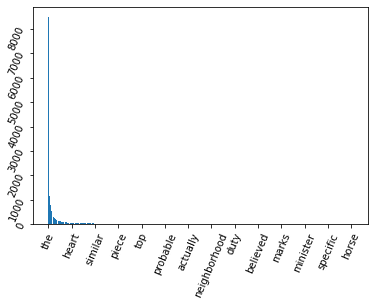

In [5]:
x, y = zip(*sorted_counts.items())

twenty = int(num_words*0.2)

fig, ax = plt.subplots()
ax.bar(x[:twenty],y[:twenty])
ax.set_xticks(list(range(0,twenty,200)))
ax.tick_params(labelrotation=67)
plt.show()

In [9]:
training, labels = gen_seq(CM,'Tokens',30)
X_train, y_train, X_test, y_test = train_test_split(training, labels, num_words)

The training sequence shape is (87461, 60), the training label shape is (87461, 13075)
The test sequence shape is (29154, 60), the test label shape is  (29154, 13075)


In [7]:
path = r'..\Short_Story_Generator\glove.6B.200d.txt'
glove = np.loadtxt(path, dtype='str', comments=None, encoding= 'UTF-8')
vectors = glove[:, 1:].astype('float')
words = glove[:, 0]
del glove

#set up embedding matrix

word_lookup = {word: vector for word, vector in zip(words, vectors)}

embedding_matrix = np.zeros((num_words, len(word_lookup['the'])))

not_found = 0

for i, word in enumerate(word_lexicon.keys()):
    # Look up the word embedding
    vector = word_lookup.get(word, None)

    # Record in matrix
    if vector is not None:
        embedding_matrix[i + 1, :] = vector
    else:
        not_found += 1

print(f'There were {not_found} words without pre-trained embeddings.')
embedding_matrix.shape

There were 3312 words without pre-trained embeddings.


(13075, 200)

In [8]:
model_dir = '..\Short_Story_Generator\Models'
model_name = 'Main_model'
SAVE_MODEL = True
BATCH_SIZE = 2048
VERBOSE = 0
EPOCHS = 150

#Run the model until the accuracy does not improve significantly and save that model.

def make_callbacks(model_name, save=SAVE_MODEL):
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
    if save:
        callbacks.append(
            ModelCheckpoint(
                f'{model_dir}{model_name}.h5',
                save_best_only=True,
                save_weights_only=False))
    return callbacks


callbacks = make_callbacks(model_name)

In [9]:
LSTM_CELLS = 128

model = make_model(
    num_words,
    embedding_matrix,
    lstm_cells=LSTM_CELLS,
    trainable=True,
    lstm_layers=2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2615000   
                                                                 
 lstm (LSTM)                 (None, None, 128)         168448    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 13075)             1686675   
                                                                 
Total params: 4,618,219
Trainable params: 4,618,219
Non-

In [10]:
model.compile(
    optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=(X_test, y_test))

In [10]:
model_dir = '..\Short_Story_Generator\Models'
model_name = 'Main_model'
model = load_model(f'{model_dir}{model_name}.h5')

generate_sequence(X_test,word_index,word_lexicon,model)

Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.
Parameter not accepted.


TypeError: sequence item 0: expected str instance, NoneType found